# <div style="font-family: cursive; background-color: #03045eff; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. Introduction</div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    📌 There is a fantastic notebook that provides an in-depth tutorial on reading large datasets. <a href="https://www.kaggle.com/code/rohanrao/tutorial-on-reading-large-datasets/notebook"> Link to notebook </a> <br>
    📌 In this notebook, I will be exploring a few ways to read in large datasets.
</div>


# <div style="font-family: cursive; background-color: #03045eff; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. Importing Libraries 📚</div>
<div style="font-family: cursive; line-height: 2; font-size:18px">
    📌 <b>Importing libraries</b> that will be used in this notebook.
</div>

In [ ]:
# base
import pandas as pd
import numpy as np

# Create List of Color Palletes 
color_mix = ['#03045e', '#023e8a', '#0077b6', '#0096c7','#00b4d8', '#48cae4', '#90e0ef','#A5E6F3', '#caf0f8']

# time
import time

# warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_size = round(os.path.getsize(os.path.join(dirname, filename)) / (1e9), 2)
        print('*' * 70)
        print(f"Filename : {filename} \t File Size : {file_size} GB")
        print('*' * 70)

<div style="font-family: cursive; line-height: 2; font-size:18px">
    📌 Note the file sizes! These files are <b>huge</b>.
</div>

# <div style="font-family: cursive; background-color: #03045eff; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. Methods </div>

## <div style="font-family: cursive; background-color: #023e8a; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.1 Using Pandas </div>

<div>
    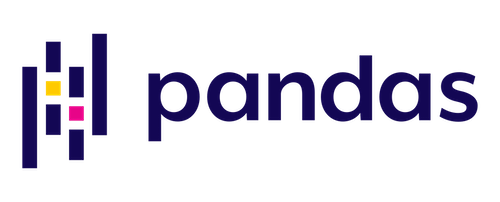
</div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    💡 <a href="https://pandas.pydata.org/"> Pandas </a> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python. <br>
</div>


In [ ]:
## This block of code have been commented as it resulted in a out of memory issue - see image below.

# start = time.time()
# df_pandas = pd.read_csv(dirname + "/train_data.csv")
# end = time.time()

# pandas_duration = end - start
# print("Time to apply with pandas: {} seconds".format(round(pandas_duration, 3)))

<div style="font-family: cursive; line-height: 2; font-size:18px">
    📌 Using <b> Pandas </b> to read the traning file resulted in a Out of memory (OOM).
</div>

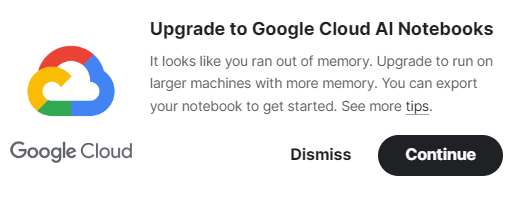


## <div style="font-family: cursive; background-color: #023e8a; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.2 Using Datatable </div>

<div>
    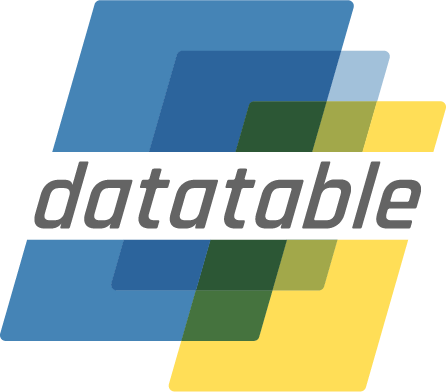
</div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    💡 <a href="https://github.com/h2oai/datatable"> Datatable </a> is a python library for manipulating tabular data. <br>
    💡 It supports out-of-memory datasets, multi-threaded data processing, and flexible API. <br>
    💡 It is specifically meant for data processing of tabular datasets with emphasis on speed and support for large sized data. <br>
    📌 Documentation: <a href="https://datatable.readthedocs.io/en/latest/index.html"> Getting started with Datatable</a>
</div>


In [ ]:
import datatable as dt

In [ ]:
start = time.time()
df_datatable = dt.fread(dirname + "/train_data.csv")
end = time.time()

datatable_duration = end - start
print("Time to apply with datatable: {} seconds".format(round(datatable_duration, 2)))

In [ ]:
df_datatable.head()

## <div style="font-family: cursive; background-color: #023e8a; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.3 Using Dask </div>

<div>
    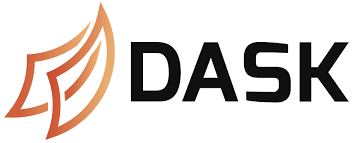
</div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    💡 <a href="https://docs.dask.org/en/stable/"> Dask </a> is a flexible library for parallel computing in Python. <br>
    💡 Dask is an open-source Python library that lets you work on large datasets. <br>
    💡 Dask Dataframes can read and store data in many of the same formats as Pandas dataframes. <br>
    📌 Documentation: <a href="https://docs.dask.org/en/latest/"> Getting started with Dask</a>
</div>

In [ ]:
import dask.dataframe as dd

In [ ]:
start = time.time()
df_dask = dd.read_csv(dirname + "/train_data.csv")
end = time.time()

dask_duration = end - start
print("Time to apply with dask: {} seconds".format(round(dask_duration, 2)))

In [ ]:
df_dask.head()

## <div style="font-family: cursive; background-color: #023e8a; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.4 Using Spark </div>

<div>
    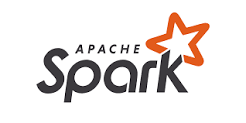
</div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    💡 <a href="https://spark.apache.org/"> Spark </a> is an open-source, distributed processing system used for big data workloads. <br>
    💡  It utilises in-memory caching, and optimized query execution for fast analytic queries against data of any size. <br>
    📌 Documentation: <a href="https://spark.apache.org/docs/latest/"> Getting started with Spark</a>
</div>


In [ ]:
!pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('readLargeFile').getOrCreate()
print('Spark info :',spark.version)

In [ ]:
import time
start = time.time()
df_spark = (spark.read.format("csv").
            option("header","true").
            load((dirname + "/train_data.csv")))
end = time.time()
spark_duration = end - start

print("Time to apply with pyspark: {} seconds".format(round(spark_duration, 2)))



# <div style="font-family: cursive; background-color: #03045eff; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. Summary </div>

<div style="font-family: cursive; line-height: 2; font-size:18px">
    📌 Using <b> Dask </b> is far quicker, so will be using this method going forwards.
</div>